AUTHOR: YUGANDAR RAJ M
TECHNICAL TASK 1 -Prediction using suprevised ML(LEVEL-BEGINNER)
PROBLEM STATEMENT :
To predict the percentage of marks of student based on the number of study hours.
What will be th predicted score if a student studies for 9.25 hrs/day?


In [2]:
#importing the required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
url= "http://bit.ly/w-data"
data=pd.read_csv(url)

In [6]:
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


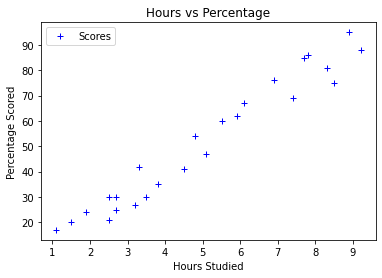

In [17]:
#plotting the distribution of scores
data.plot(x='Hours',y='Scores',style='+',color='Blue')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

From the graph above ,we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

    

PREPARING THE DATA 

The next step is to divide the data into "attributes"and "lables".
In this data set attributes will be"hours" and labrls will be "scores" 

In [18]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [19]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [20]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [28]:
from sklearn.model_selection import train_test_split
x_train ,x_test ,y_train ,y_test =train_test_split(x,y, test_size=0.2,random_state=0)


In [ ]:
TRANING ALGORITHM

In [29]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
print("Training Complete")



Training Complete


<function matplotlib.pyplot.show(*args, **kw)>

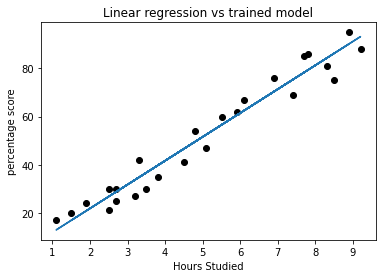

In [31]:
line = regressor.coef_*x+regressor.intercept_
plt.title("Linear regression vs trained model")
plt.scatter(x,y,color='black')
plt.xlabel('Hours Studied')
plt.ylabel('percentage score')
plt.plot(x,line);
plt.show

MAKING PREDICTIONS
Now that we have trained our algorithm .Next we will make predictions.


In [32]:
print(x_test)
y_pred=regressor.predict(x_test)


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [33]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [35]:
df=pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


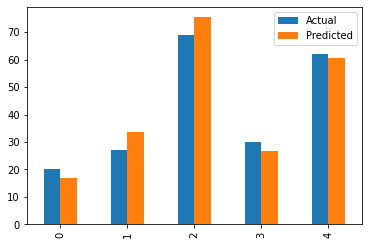

In [36]:
df.plot(kind='bar')

MODEL EVALUATION 

In [37]:
from sklearn import metrics
print('Mean Absolute Error is:', metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error is: 4.183859899002975


In [39]:
print('R square value for train data is ',regressor.score(x_train,y_train))

R square value for train data is  0.9515510725211552


In [40]:
print('R square value for testt data is ',regressor.score(x_test,y_test))

R square value for testt data is  0.9454906892105356


In [41]:
print("slope of regression line",regressor.coef_)
print("y-intercept of Regression line ", regressor.intercept_)

slope of regression line [9.91065648]
y-intercept of Regression line  2.018160041434683


INTERPRETATION :
The best fitted simple linear equation is :y=2.018160041434662+9.91065648(x).

In [43]:
#what will be predicted score if a student studies for 9.25 hrs/day ?
hours=9.25
test=np.array([hours])
test=test.reshape(-1,1)
pred=regressor.predict([[9.5]])
print("No of Hours ={}".format(hours))
print ("predicted score ={}".format(pred[0]))

No of Hours =9.25
predicted score =96.16939660753593


THANK YOU 